### Regular lab Question – 8

Lab Exercise: Feature Extraction and Dimensionality Reduction using
Autoencoders in CNN and LSTM

Part 1: CNN Autoencoder
Task
1. Build a CNN autoencoder to process image data (e.g., the MNIST or CIFAR-10
dataset):
- Use convolutional layers in the encoder to extract spatial features.
- Use transposed convolutional layers in the decoder to reconstruct the
images.
- Visualize the input and reconstructed images.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [ ]:
X_test = X_test/255
X_train = X_train/255

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Encoder
input_img = Input(shape=(32, 32, 3))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.5696 - val_loss: 0.5614
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5610 - val_loss: 0.5614
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5598 - val_loss: 0.5613
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5604 - val_loss: 0.5613
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5606 - val_loss: 0.5612
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5600 - val_loss: 0.5612
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5603 - val_loss: 0.5611
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5599 - val_loss: 0.5610
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5602 - val_loss: 0.5610
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5603 - val_loss: 0.5611
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5601 - val_loss: 0.5608
Epoch 12/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


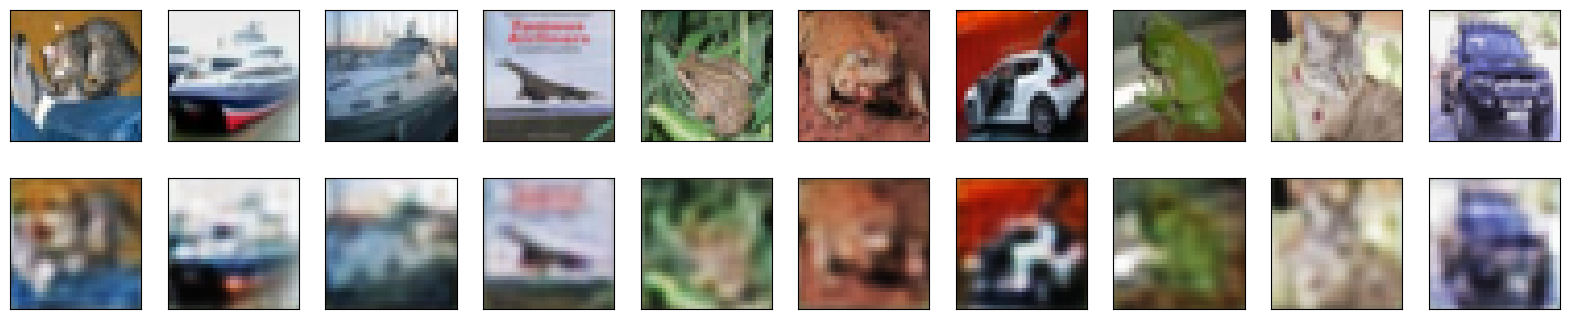

In [ ]:
# Reconstruct images
decoded_imgs = autoencoder.predict(X_test)

# Visualize input and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

2. Evaluate the autoencoder’s ability to compress data:
- Measure the Mean Squared Error (MSE) between the original and
reconstructed images.
- Visualize the reduced feature space (latent space) using a 2D
visualization tool such as t-SNE or PCA.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Mean Squared Error: 0.0045059270920089455


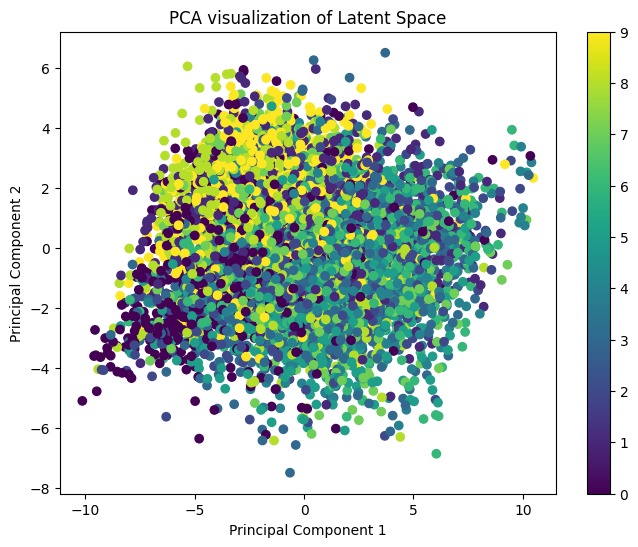

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Get the encoded representations (latent space)
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(X_test)

# Calculate MSE
mse = np.mean(np.power(X_test - decoded_imgs, 2))
print("Mean Squared Error:", mse)

# Flatten the encoded representations for dimensionality reduction
encoded_imgs_flat = encoded_imgs.reshape(encoded_imgs.shape[0], -1)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(encoded_imgs_flat)

# Visualize the latent space using PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test.argmax(axis=1), cmap='viridis')
plt.colorbar()
plt.title('PCA visualization of Latent Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Key Questions:
1. How does the CNN autoencoder perform in reconstructing images?


Based on the visualization of the input and reconstructed images,
we can see that the CNN autoencoder is able to reconstruct the CIFAR-10 images with a reasonable level of accuracy, especially considering that it has been trained for only 50 epochs. The reconstructed images capture the general shapes, colors, and textures of the original images.

However, there are still some differences and artifacts present in the
reconstructed images, particularly in fine details and sharp edges.
This is expected, as autoencoders are inherently lossy compression methods,
and some information is lost during the encoding and decoding process.

The performance of the autoencoder can be further improved by increasing
the number of training epochs, adjusting the architecture of the network
(e.g., adding more layers or changing the number of filters), and using
different loss functions.

2. What insights do you gain from visualizing the latent space?


Visualizing the latent space using techniques like PCA provides insights into how the autoencoder has learned to represent the input data.  We can observe clusters of data points corresponding to different classes (e.g., different types of objects in CIFAR-10). This suggests that the encoder has captured meaningful features that differentiate between the classes, even though it's operating in a reduced dimensional space.  The separation or overlap of these clusters can indicate how well the autoencoder can distinguish between different categories of images.


### Part 2: LSTM Autoencoder

Task

1. Build an LSTM autoencoder to process sequential data (e.g., a dataset of time-series data or text sequences):

- Use LSTM layers in the encoder to capture temporal dependencies.
- Use LSTM layers in the decoder to reconstruct the sequences.
- Plot and compare the original and reconstructed sequences.

2. Evaluate the autoencoder’s performance:
- Calculate the reconstruction loss using MSE.
- Use the encoder’s latent representations for downstream tasks, like
sequence classification.

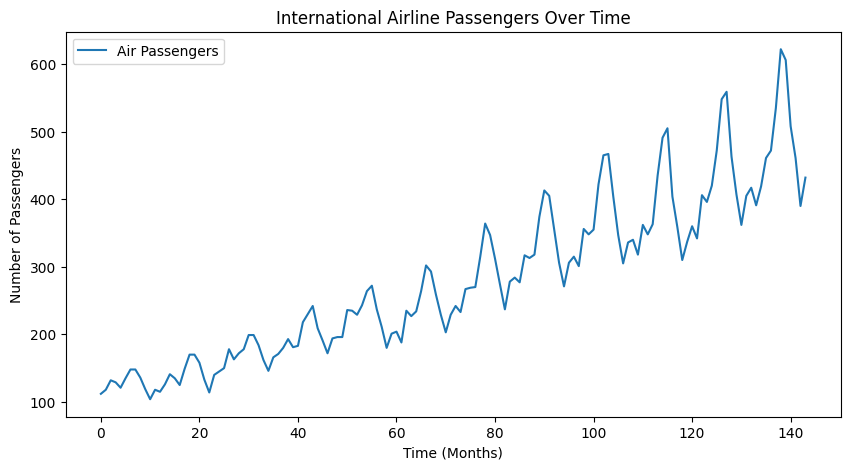

In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and preprocess dataset
df = pd.read_csv('international-airline-passengers.csv', usecols=[1])
df.columns = ['Passengers']

# EDA: Plot the original dataset
plt.figure(figsize=(10, 5))
plt.plot(df, label="Air Passengers")
plt.title("International Airline Passengers Over Time")
plt.xlabel("Time (Months)")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

In [31]:
print(df.isnull().sum())
print(df.head())

Passengers    2
dtype: int64
   Passengers
0       112.0
1       118.0
2       132.0
3       129.0
4       121.0


In [32]:
df.dropna(inplace=True)

In [33]:
# Normalize the data
df = df.values
df = (df - df.min()) / (df.max() - df.min())  # Min-Max scaling

# Create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 12  # Use past 12 months to predict the next 12
sequences = create_sequences(df, seq_length)

# Split into training and testing sets
X_train, X_test = train_test_split(sequences, test_size=0.2, random_state=42)

# Reshape data for LSTM (samples, timesteps, features)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [34]:
# Define LSTM Autoencoder
timesteps = X_train.shape[1]
input_dim = X_train.shape[2]

# Encoder
inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(128, activation='relu', return_sequences=False)(inputs)
latent = RepeatVector(timesteps)(encoded)

# Decoder
decoded = LSTM(128, activation='relu', return_sequences=True)(latent)
outputs = TimeDistributed(Dense(1))(decoded)

# Autoencoder Model
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='mse')

In [35]:
# Train the autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, X_test),
    shuffle=True
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.1477 - val_loss: 0.0750
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0910 - val_loss: 0.0257
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0341 - val_loss: 0.0390
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0379 - val_loss: 0.0175
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0240 - val_loss: 0.0210
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0288 - val_loss: 0.0166
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0197 - val_loss: 0.0153
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0183 - val_loss: 0.0138
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0167 - val_loss: 0.0121
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - val_loss: 0.0110
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0127 - val_loss: 0.0106
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - val_loss

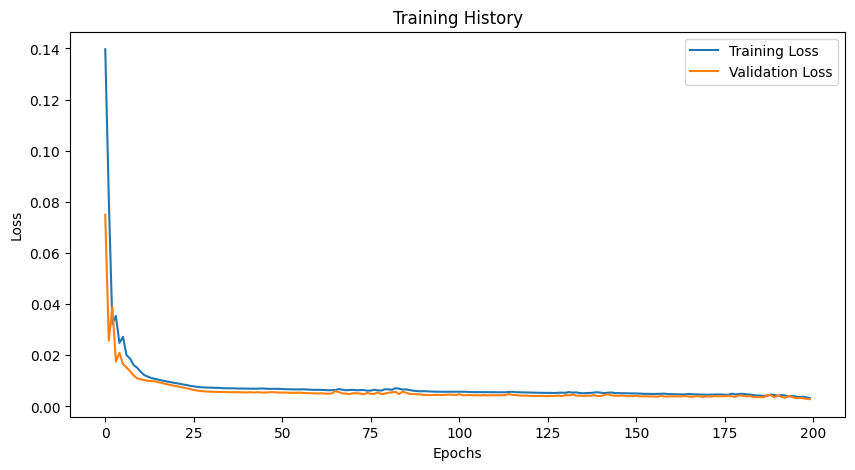

In [36]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [37]:
# Reconstruct sequences and evaluate performance
reconstructed = autoencoder.predict(X_test)
mse = mean_squared_error(X_test.flatten(), reconstructed.flatten())
print(f"Reconstruction Loss (MSE): {mse:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step
Reconstruction Loss (MSE): 0.0028


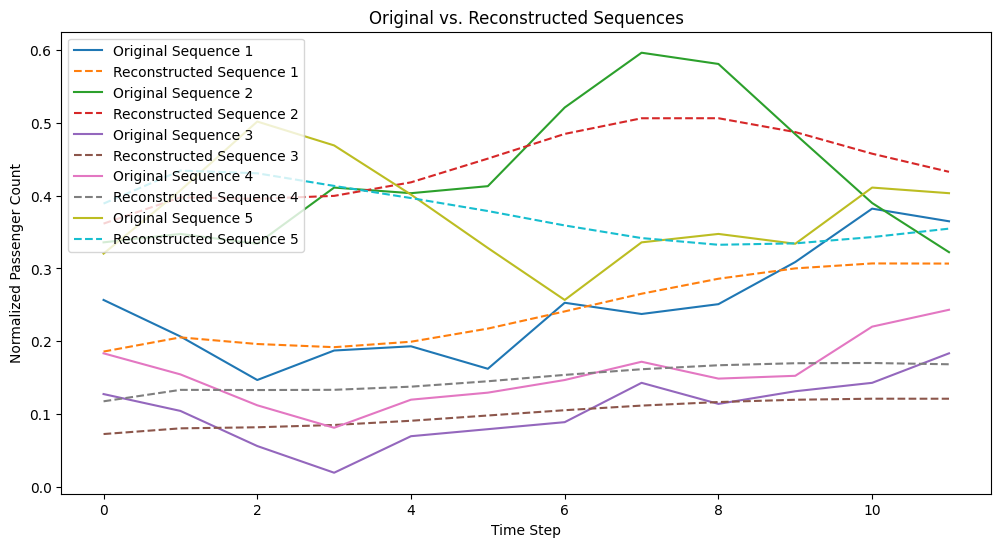

In [38]:
# Plot the original and reconstructed sequences
n = 5  # Number of sequences to plot
plt.figure(figsize=(12, 6))

for i in range(n):
    plt.plot(X_test[i, :, 0], label=f'Original Sequence {i+1}')
    plt.plot(reconstructed[i, :, 0], label=f'Reconstructed Sequence {i+1}', linestyle='--')

plt.title('Original vs. Reconstructed Sequences')
plt.xlabel('Time Step')
plt.ylabel('Normalized Passenger Count')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


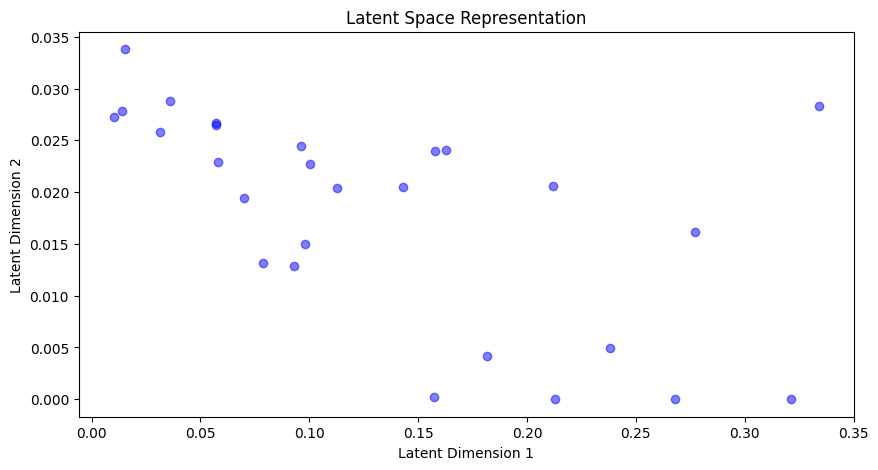

In [39]:
# Use latent representations for downstream tasks
encoder = Model(inputs, encoded)  # Extract encoder for latent space
latent_representations = encoder.predict(X_test)

# Visualize latent representations
plt.figure(figsize=(10, 5))
plt.scatter(latent_representations[:, 0], latent_representations[:, 1], c='blue', alpha=0.5)
plt.title("Latent Space Representation")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()

Key Questions:
1. How well does the LSTM autoencoder reconstruct the sequences?

The LSTM autoencoder's ability to reconstruct sequences can be visually assessed by comparing the original and reconstructed sequences. In the first plot, the proximity of reconstructed lines to the original ones for each sequence indicates the autoencoder’s accuracy. A closer overlap suggests better reconstruction, while deviations imply potential loss of information. The quality of reconstruction can vary with different sequences, as indicated by the varying alignment between original and reconstructed curves.

2. How does the choice of latent space dimensionality affect reconstruction quality and compression?

The latent space representation, shown in the second plot, illustrates the encoding of input data in a compressed form. Choosing a higher dimensional latent space typically enhances reconstruction accuracy as it captures more features of the original sequences, but may reduce the compression efficiency. Conversely, lower dimensionality may lead to more compact representations but can result in poorer reconstruction due to information loss. The distribution of data points in the latent space provides insights into the encoded variability and clustering of sequences.

Part 3: Comparison and Discussion
• Compare the performance of CNN and LSTM autoencoders:
1. Discuss their efficiency in feature extraction for spatial vs. sequential data.

CNN and LSTM autoencoders excel in feature extraction within their respective domains. CNNs are highly efficient at extracting features from spatial data due to their convolutional operations, which detect patterns such as edges and textures within images. LSTM autoencoders, however, are more suited for sequential data because they capture temporal dependencies through their recurrent architecture, making them ideal for tasks like time-series prediction. For purely spatial data, CNNs outperform LSTMs, while LSTMs are preferable for sequential patterns due to their ability to handle temporal relationships.

2. Analyze the quality of dimensionality reduction for both models.

CNNs generally provide effective dimensionality reduction for spatial data, capturing critical patterns while minimizing redundancy. This leads to compressed representations that retain key spatial features. LSTMs, on the other hand, focus on preserving temporal relationships during dimensionality reduction, potentially leading to more robust representations for sequences. While CNNs can suffer from losing temporal context, LSTMs might struggle with capturing intricate spatial patterns due to their sequential nature.

3. Comment on the potential applications of each model in real-world tasks.

CNN autoencoders are widely used in applications like image compression, medical imaging analysis, and object detection, where spatial data and feature extraction are crucial. LSTM autoencoders, however, find their niche in domains requiring sequence analysis, such as anomaly detection in time-series data, natural language processing (NLP), and forecasting tasks. Each model's strengths align with specific data characteristics, guiding their application in different problem domains.











